Fazer os exercícios 1c, 2, 5, 8, 10, 13, 16

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, sin, exp 
from sympy.abc import x,y 
from sympy.utilities.lambdify import lambdify, implemented_function


In [162]:
def trapezio(xk,yk,x0,x1,func,cor='red'):
    assert x1>x0
    xk = np.array(xk,dtype=np.float64)
    yk = np.array(yk,dtype=np.float64)

    dx = x1-x0
    area =((func(x0))+func(x1)) *dx/2
    print(area)
    plt.plot(xk,yk)
    plt.grid()
    
    plt.fill_between(np.array([x0,x1],dtype=np.float64),np.array([func(x0),func(x1)],dtype=np.float64),color = cor)
    #plt.yticks(np.arange(0,max(yk),max(yk)/15))
    return area

In [163]:
def trapezios_repetidos(xk,yk,func,inicio,fim,points):
    """Gera o gráfico e valor da integral com base na lista de pontos definida

    Args:
        xk (list)
        yk (list) 
        points (int): Quantidade de pontos em que o intervalo será dividido

    Returns:
        _type_: _description_
    """
    space = np.linspace(inicio,fim,points+1)
    print(space)
    soma = 0
    cores = ('r','green','yellow','purple','orange','blue')
    for i,c in enumerate(space):
        if i == 0: continue

        soma += trapezio(xk,yk,space[i-1],c,func,cor = cores[i%len(cores)])
    plt.show()
    #erro = (space[1]-space[0])**3/12*points
    #print(f'{erro=}')
    return soma

# 1)
## c)

In [164]:
x4 = np.linspace(2,14,4)
x6 = np.linspace(2,14,6)
xlist = np.linspace(2,14,24)

lam_f = lambda i: 1/i**.5

y4=[lam_f(w) for w in x4]
y4 = np.array(y4,dtype=np.float64)

y6=[lam_f(w) for w in x6]
y6 = np.array(y6,dtype=np.float64)

ylist = [lam_f(w) for w in xlist]
ylist = np.array(ylist,dtype=np.float64)

### Trapézios - 4 divisões

[ 2.  5.  8. 11. 14.]
1.731480565029758
1.2011504791398475
0.9825971027565561
0.853158879735282


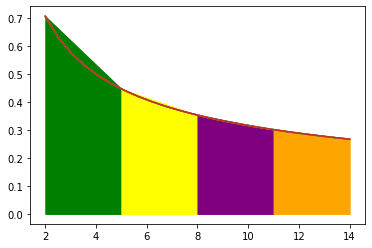

4.768387026661443

In [165]:
trapezios_repetidos(xlist,ylist,lam_f,x4[0],x4[-1],4)

### Trapézios - 6 divisões

[ 2.  4.  6.  8. 10. 12. 14.]
1.2071067811865475
0.9082482904638631
0.7618016810571369
0.6697811566101117
0.6049029006116509
0.5559363765072374


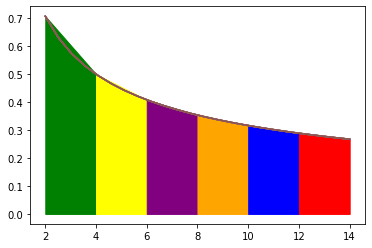

4.707777186436548

In [166]:
trapezios_repetidos(xlist,ylist,lam_f,x6[0],x6[-1],6)

In [167]:
def simpson(xk,func,intervalos=6):

    def passo(xk,func):
        h = xk[1]-xk[0]
        return (func(xk[0])+4*func(xk[len(xk)//2])+func(xk[-1]))*h/3
    
    xk = np.linspace(xk[0],xk[-1],intervalos+1,dtype = 'float64')
    print(xk)
    soma = 0
    for c in range(0,len(xk)-1,2):
        print(xk[c:c+3])
        soma+=passo(xk[c:c+3],func)
    return soma


### Simpson - 4 divisões

In [168]:

simpson(xlist,lam_f,4)


[ 2.  5.  8. 11. 14.]
[2. 5. 8.]
[ 8. 11. 14.]


4.676374564596406

### Simpson - 6 divisões

In [169]:
simpson(xlist,lam_f,6)


[ 2.  4.  6.  8. 10. 12. 14.]
[2. 4. 6.]
[ 6.  8. 10.]
[10. 12. 14.]


4.6614894912084806

# 5)

In [170]:
funcao = lambda x:3*x**3-3*x+1
simpson(range(5),funcao,2)

[0. 2. 4.]
[0. 2. 4.]


172.0

[0. 1. 2. 3. 4.]
1.0
10.0
46.0
127.0


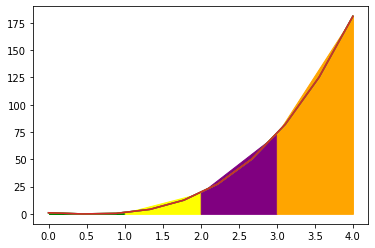

184.0

In [171]:
space = np.linspace(0,4,10)
trapezios_repetidos(space,[funcao(w) for w in space],funcao,0,4,4)

# 8)

10

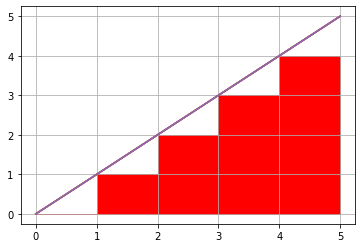

In [172]:
def retangulo_esq(xk,yk,x0,x1,func,cor='red'):
    assert x1>x0
    xk = np.array(xk,dtype=np.float64)
    yk = np.array(yk,dtype=np.float64)

    dx = x1-x0
    area =(func(x0))*dx
    plt.plot(xk,yk)
    plt.grid()
    
    plt.fill_between(np.array([x0,x1],dtype=np.float64),np.array([func(x0)]*2,dtype=np.float64),color = cor)
    #plt.yticks(np.arange(0,max(yk),max(yk)/15))
    return area
soma=0
for c in range(5):
    soma+=retangulo_esq(range(6),range(6),c,c+1,lambda x:x)
soma

0.5
1.5
2.5
3.5
4.5
12.5


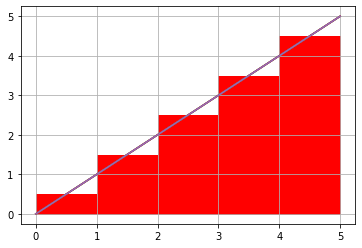

In [173]:
def retangulo_pm(xk,yk,x0,x1,func,cor='red'):
    assert x1>x0
    xk = np.array(xk,dtype=np.float64)
    yk = np.array(yk,dtype=np.float64)

    dx = x1-x0
    area =((func(x0))+func(x1)) *dx/2
    print(area)
    plt.plot(xk,yk)
    plt.grid()
    
    plt.fill_between(np.array([x0,x1],dtype=np.float64),np.array([((func(x0))+func(x1))/2]*2,dtype=np.float64),color = cor)
    #plt.yticks(np.arange(0,max(yk),max(yk)/15))
    return area
soma=0
for c in range(5):
    soma+=retangulo_pm(range(6),range(6),c,c+1,lambda x:x)
print(soma)

# 10)

Poly(-0.0489692195929408*x**2 + 1.00320193492703*x, x, domain='RR')


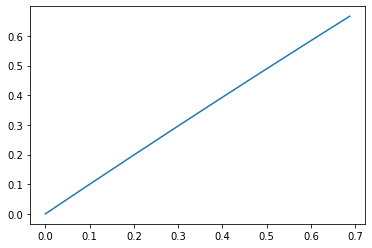

In [187]:
def Lagrange(xk, yk, grau=2,show=False, a=0, b=10, step=.1):
    """
    Returns:
        Y=[Sympy.Poly]: O polinômio final da soma das expressões de Lagrange
        L=[List]: Todas as expressões Ln geradas
    """

    x = sympy.symbols('x')
    if len(xk) != len(yk):
        return -1  # Error
    Pk = 0

    
    L = []
    for k in range(grau+1):
        Lk = 1
        for j in range(grau+1):
            if j != k:
                Lk *= ((x-xk[j]) / (xk[k]-xk[j]))  # Cada fração

        #Junta os polis de lagrange em uma função
        Pk += Lk*yk[k]  # Total
        L.append(Lk) # Guarda todos os polis de lagrange


    L = [sympy.Poly(n) for n in L]
    Pk = sympy.Poly(Pk)
    
    #Imprime o polinômio
    sympy.pprint(sympy.pretty(Pk))

    #mostrar o grafico dos polinomios
    if show:
        plt.figure(figsize=(8, 6), dpi=80)

        Lcoeffs = [z.all_coeffs() for z in L]
        # get the polynomial function
        P = [poly(z[::-1]) for z in Lcoeffs]

        margin = np.arange(a, b, step)


        for z in P:
            plt.plot(margin, z(margin))

        plt.plot(xk, np.ones(len(xk)), 'ko', xk, np.zeros(len(xk)), 'ko')
        plt.title('Polinômios de Lagrange')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.grid()
        plt.legend([f'L{n}' for n in range(grau+1)])
        plt.show()

    return Pk, L


xi = np.arange(0, np.pi/4, np.pi/4/8)
yi = np.sin(xi)
lag10 = Lagrange(xi,yi,b=np.pi/4,step=8)[0]
plt.plot(xi,[lag10.subs(x,z) for z in xi])

In [ ]:
simpson(xi, lag10)

# 13)

In [210]:
x13 = np.linspace(0,1,6)
y13 = [1,1.2408,1.5735,2.0333,2.6965,3.7183]
func13,_ = Lagrange(x13,y13,grau=5)

simpson(x13,func13)

Poly(0.984375*x**5 - 0.898437499999773*x**4 + 0.827083333333007*x**3 + 0.78593
         7500000102*x**2 + 1.01934166666667*x + 1.0, x, domain='RR')          
[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]
[0.         0.16666667 0.33333333]
[0.33333333 0.5        0.66666667]
[0.66666667 0.83333333 1.        ]


1.96295658436214

In [213]:
x14=np.linspace(0,1,11)
func = lambda x: 1/(1+x**2)
simpson(x14,func,4)

[0.   0.25 0.5  0.75 1.  ]
[0.   0.25 0.5 ]
[0.5  0.75 1.  ]


0.7853921568627451

In [214]:
np.pi/4

0.7853981633974483